# Multi-Geography Indicators

Many indicators return data for multiple geographies (countries, regions).
The v2 client pivots these automatically into wide-format DataFrames.

In [1]:
from esios import ESIOSClient

client = ESIOSClient()

## Spot price across countries

Indicator 600 (spot price) returns data for 8 European countries:

In [2]:
handle = client.indicators.get(600)
handle.geos_dataframe()

,geo_id,geo_name
0,1,Portugal
1,2,Francia
2,3,España
3,8826,Alemania
4,8827,Bélgica
5,8828,Países Bajos


In [3]:
df = handle.historical("2025-01-01", "2025-01-07")
df

,Portugal,Francia,España,Alemania,Bélgica,Países Bajos
datetime,,,,,,
2025-01-01 00:00:00+01:00,134.49,12.36,134.49,2.16,10.62,13.62
2025-01-01 00:15:00+01:00,134.49,12.36,134.49,2.16,10.62,13.62
2025-01-01 00:30:00+01:00,134.49,12.36,134.49,2.16,10.62,13.62
2025-01-01 00:45:00+01:00,134.49,12.36,134.49,2.16,10.62,13.62
2025-01-01 01:00:00+01:00,131.59,18.92,131.59,1.60,10.27,6.24
...,...,...,...,...,...,...
2025-01-07 22:45:00+01:00,98.53,98.53,98.53,72.45,111.04,82.20
2025-01-07 23:00:00+01:00,89.27,89.27,89.27,50.04,107.09,80.01
2025-01-07 23:15:00+01:00,89.27,89.27,89.27,50.04,107.09,80.01


Each column is a country name. This makes plotting and analysis straightforward.

## Compare two countries

<Axes: title={'center': 'Spain vs Portugal Spot Price (€/MWh)'}, xlabel='datetime'>

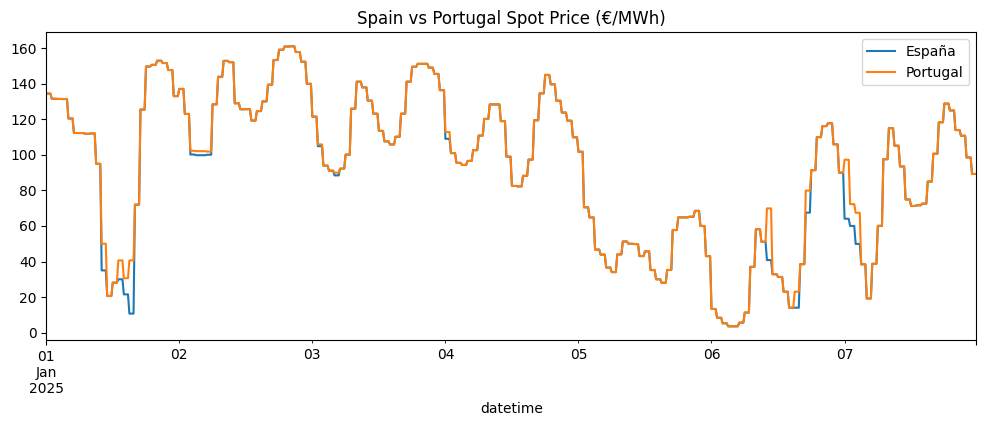

In [4]:
df[["España", "Portugal"]].plot(
    figsize=(12, 4),
    title="Spain vs Portugal Spot Price (€/MWh)",
)

## Correlation matrix

In [5]:
df.corr().round(2)

,Portugal,Francia,España,Alemania,Bélgica,Países Bajos
Portugal,1.00,0.66,0.99,0.42,0.64,0.60
Francia,0.66,1.00,0.67,0.89,0.99,0.87
España,0.99,0.67,1.00,0.44,0.65,0.61
Alemania,0.42,0.89,0.44,1.00,0.89,0.74
Bélgica,0.64,0.99,0.65,0.89,1.00,0.90
Países Bajos,0.60,0.87,0.61,0.74,0.90,1.00


## Select specific geographies

Use `geo_ids` to fetch only the countries you need, reducing API calls:

In [6]:
spain_id = handle.resolve_geo("España")
france_id = handle.resolve_geo("Francia")

df_subset = handle.historical(
    "2025-01-01", "2025-01-07",
    geo_ids=[spain_id, france_id],
)
df_subset

,España,Francia
datetime,,
2025-01-01 00:00:00+01:00,134.49,12.36
2025-01-01 00:15:00+01:00,134.49,12.36
2025-01-01 00:30:00+01:00,134.49,12.36
2025-01-01 00:45:00+01:00,134.49,12.36
2025-01-01 01:00:00+01:00,131.59,18.92
...,...,...
2025-01-07 22:45:00+01:00,98.53,98.53
2025-01-07 23:00:00+01:00,89.27,89.27
2025-01-07 23:15:00+01:00,89.27,89.27
